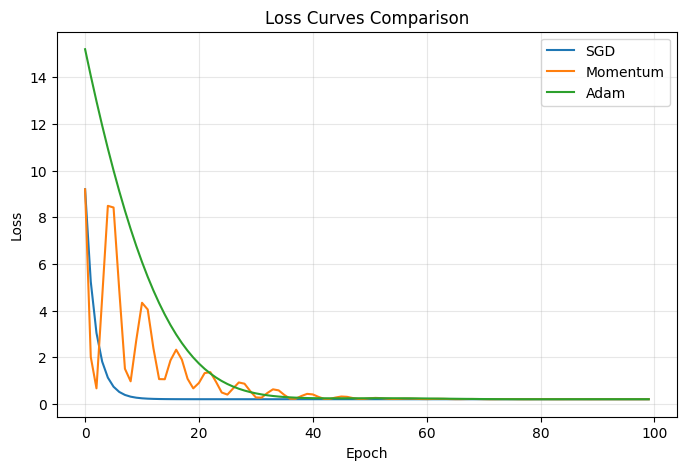

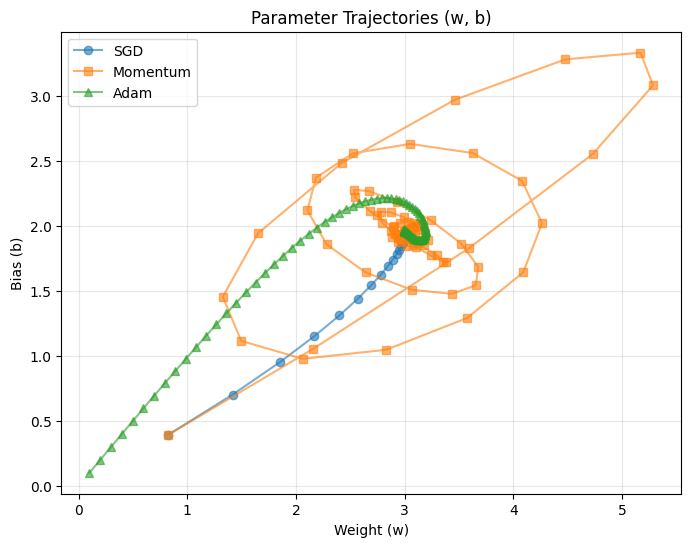

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. generate simple regression data
np.random.seed(42)
X = np.linspace(-2, 2, 100)
y = 3 * X + 2 + np.random.randn(100) * 0.5

# 2. loss and gradients
def loss(w, b):
    y_pred = w * X + b
    return np.mean((y_pred - y) ** 2)

def gradients(w, b):
    y_pred =  w * X + b
    dw = 2 * np.mean((y_pred - y) * X)
    db = 2 * np.mean(y_pred - y)
    return dw, db

# 3. optimizers from scratch
epochs = 100
lr = 0.1

# SGD
w_sgd, b_sgd = 0.0, 0.0
loss_sgd = []
traj_sgd = []

for _ in range(epochs):
    dw, db = gradients(w_sgd, b_sgd)
    w_sgd -= lr * dw
    b_sgd -= lr * db

    loss_sgd.append(loss(w_sgd, b_sgd))
    traj_sgd.append((w_sgd, b_sgd))

# Momentum
w_m, b_m = 0.0, 0.0
vw, vb = 0.0, 0.0
beta = 0.9

loss_m = []
traj_m = []

for _ in range(epochs):
    dw, db = gradients(w_m, b_m)

    vw = beta * vw + dw
    vb = beta * vb + db

    w_m -= lr * vw
    b_m -= lr * vb

    loss_m.append(loss(w_m, b_m))
    traj_m.append((w_m, b_m))

# Adam
w_a, b_a = 0.0, 0.0
mw, vw = 0.0, 0.0
mb, vb = 0.0, 0.0
beta1, beta2 = 0.9, 0.999
eps = 1e-8

loss_a = []
traj_a = []

for t in range(1, epochs + 1):
    dw, db = gradients(w_a, b_a)

    mw = beta1 * mw + (1 - beta1) * dw
    vw = beta2 * vw + (1 - beta2) * (dw ** 2)
    mb = beta1 * mb + (1 - beta1) * db
    vb = beta2 * vb + (1 - beta2) * (db ** 2)

    mw_hat = mw / (1 - beta1 ** t)
    vw_hat = vw / (1 - beta2 ** t)
    mb_hat = mb / (1 - beta1 ** t)
    vb_hat = vb / (1 - beta2 ** t)

    w_a -= lr * mw_hat / (np.sqrt(vw_hat) + eps)
    b_a -= lr * mb_hat / (np.sqrt(vb_hat) + eps)

    loss_a.append(loss(w_a, b_a))
    traj_a.append((w_a, b_a))

# 4. plot loss curves
plt.figure(figsize=(8,5))
plt.plot(loss_sgd, label="SGD")
plt.plot(loss_m, label="Momentum")
plt.plot(loss_a, label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves Comparison")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# 5. Parameter trajectory visualization
traj_sgd = np.array(traj_sgd)
traj_m = np.array(traj_m)
traj_a = np.array(traj_a)

plt.figure(figsize=(8,6))
plt.plot(traj_sgd[:,0], traj_sgd[:,1], marker="o", alpha=0.6, label="SGD")
plt.plot(traj_m[:,0], traj_m[:,1], marker="s", alpha=0.6, label="Momentum")
plt.plot(traj_a[:,0], traj_a[:,1], marker="^", alpha=0.6, label="Adam")

plt.xlabel("Weight (w)")
plt.ylabel("Bias (b)")
plt.title("Parameter Trajectories (w, b)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()